# Import Required Libraries
Import the necessary libraries, including geopandas, matplotlib, and pandas.

In [1]:
# Import Required Libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import config
import os
import tempfile
import zipfile

# Load the active members data

In [2]:
active_members_extra_gender_df = pd.read_csv(config.ACTIVE_MEMBERS_EXTRA_GENDER)

# Read Shapefile from Zip File
Read the shapefile from the zip file and load it into a GeoDataFrame.

In [3]:
# Read the shapefile from the zip file and load it into a GeoDataFrame
with zipfile.ZipFile(config.NE_50M_COUNTRIES_ZIP, 'r') as zip_ref:
    with tempfile.TemporaryDirectory() as tmpdirname:
        zip_ref.extractall(tmpdirname)
        shapefile_path = os.path.join(tmpdirname, 'ne_50m_admin_0_countries.shp')
        world_df = gpd.read_file(shapefile_path)

# Group by Country and Count Members
Group the active members by country and count the number of members in each country.

In [4]:
# Group by Country and Count Members
country_distribution = active_members_extra_gender_df['country'].value_counts().reset_index()
country_distribution.columns = ['country', 'count']

# Merge Country Distribution with World Map
Merge the country distribution DataFrame with the world map GeoDataFrame.

In [5]:
# Merge the filtered country distribution with the world map
merged_df = world_df.merge(country_distribution, how='left', left_on='SOVEREIGNT', right_on='country')

# Plot the World Map
Plot the world map, showing the countries with counted members, and save the plot.

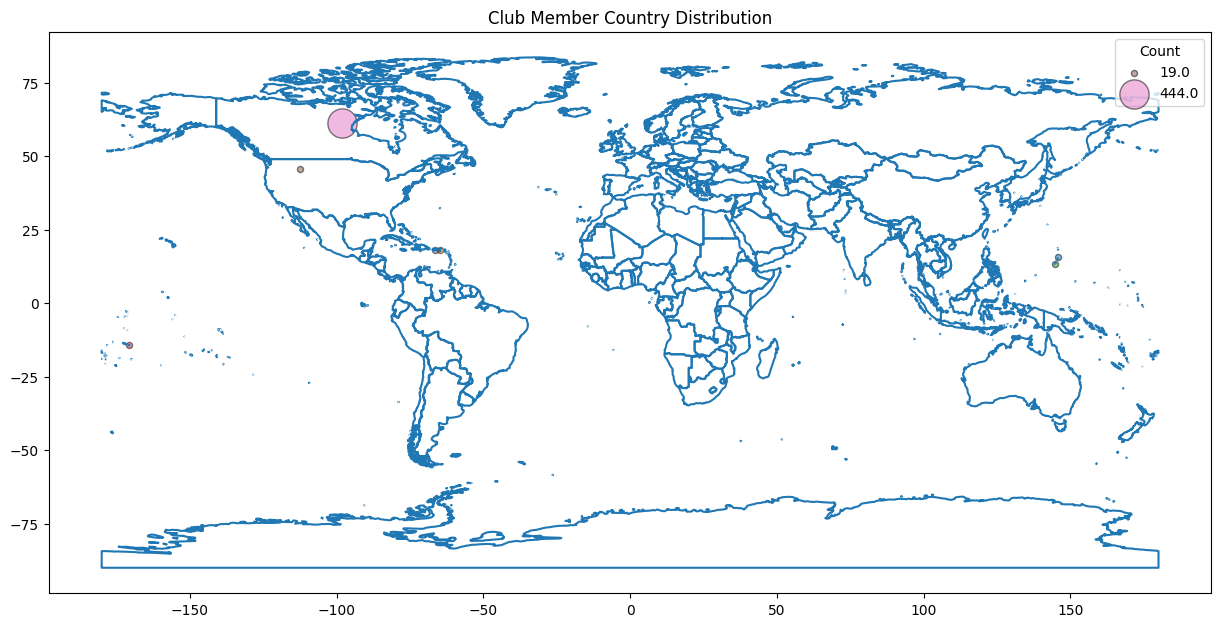

In [6]:
# Plot the Filtered Map

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_df.boundary.plot(ax=ax)

# Scaling factor for bubble sizes
scaling_factor = 1

# Plot members
for idx, row in merged_df.iterrows():
    if not pd.isna(row['count']):
        ax.scatter(row['geometry'].centroid.x, row['geometry'].centroid.y,
                   s=row['count'] * scaling_factor, alpha=0.5, edgecolor='k', label=row['count'])

# Add legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), title='Count')

# merged_df.plot(column='count', ax=ax, legend=False, cmap='OrRd', missing_kwds={'color': 'lightgrey'})
plt.title('Club Member Country Distribution')

# Save and show the plot
plt.savefig(config.CLUB_MEMBER_COUNTRY_DISTRIBUTION)
plt.show()